# Bagging and boosting


In [187]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [188]:
from sklearn.datasets import fetch_openml
heart= fetch_openml(name='heart-disease', version=1, as_frame=True)
df=heart.frame
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


In [189]:
df['target'].unique()

array([1., 0.])

In [190]:
# Select All the feature s as  categorical where the unique values are less than 5
categorical_features=[]
numerical_features=[]
for  feat in df.columns:
    if feat not in ['target']:
        if len(df[feat].unique())<=5:
            categorical_features.append(feat)
        else:
            numerical_features.append(feat)

print(f"Numerical features are: {numerical_features}")
print(f"Categorical features are: {categorical_features}")

Numerical features are: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Categorical features are: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [191]:
x=df.drop(columns=['target'])#features
y=df['target']#target

In [192]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (242, 13)
Shape of x_test: (61, 13)
Shape of y_train: (242,)
Shape of y_test: (61,)


In [193]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train[numerical_features]=scaler.fit_transform(x_train[numerical_features])
x_test[numerical_features]=scaler.transform(x_test[numerical_features])

x_train[numerical_features]

,age,trestbps,chol,thalach,oldpeak
19,1.610480,0.461840,-0.123235,0.039942,0.604853
247,1.282051,1.575595,0.023366,-1.373486,-0.890458
289,0.077810,-0.206413,-0.835301,-0.917541,0.770998
288,0.296763,-1.208792,1.887302,-0.324813,1.601727
60,1.829433,-1.208792,0.421285,-0.917541,-0.890458
...,...,...,...,...,...
39,1.172574,1.575595,2.410879,0.039942,-0.225876
104,-0.469573,-0.150725,-1.023789,0.587076,-0.890458
140,-0.360096,-0.651915,1.049578,0.313509,-0.392021
114,0.077810,-0.095037,0.358456,0.222320,-0.890458


In [194]:
# traning model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100, 150],
    'max_depth': [None, 3, 5],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2],
}

clf=RandomForestClassifier( random_state=42)

Grid_rf=GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,

)

In [195]:
Grid_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

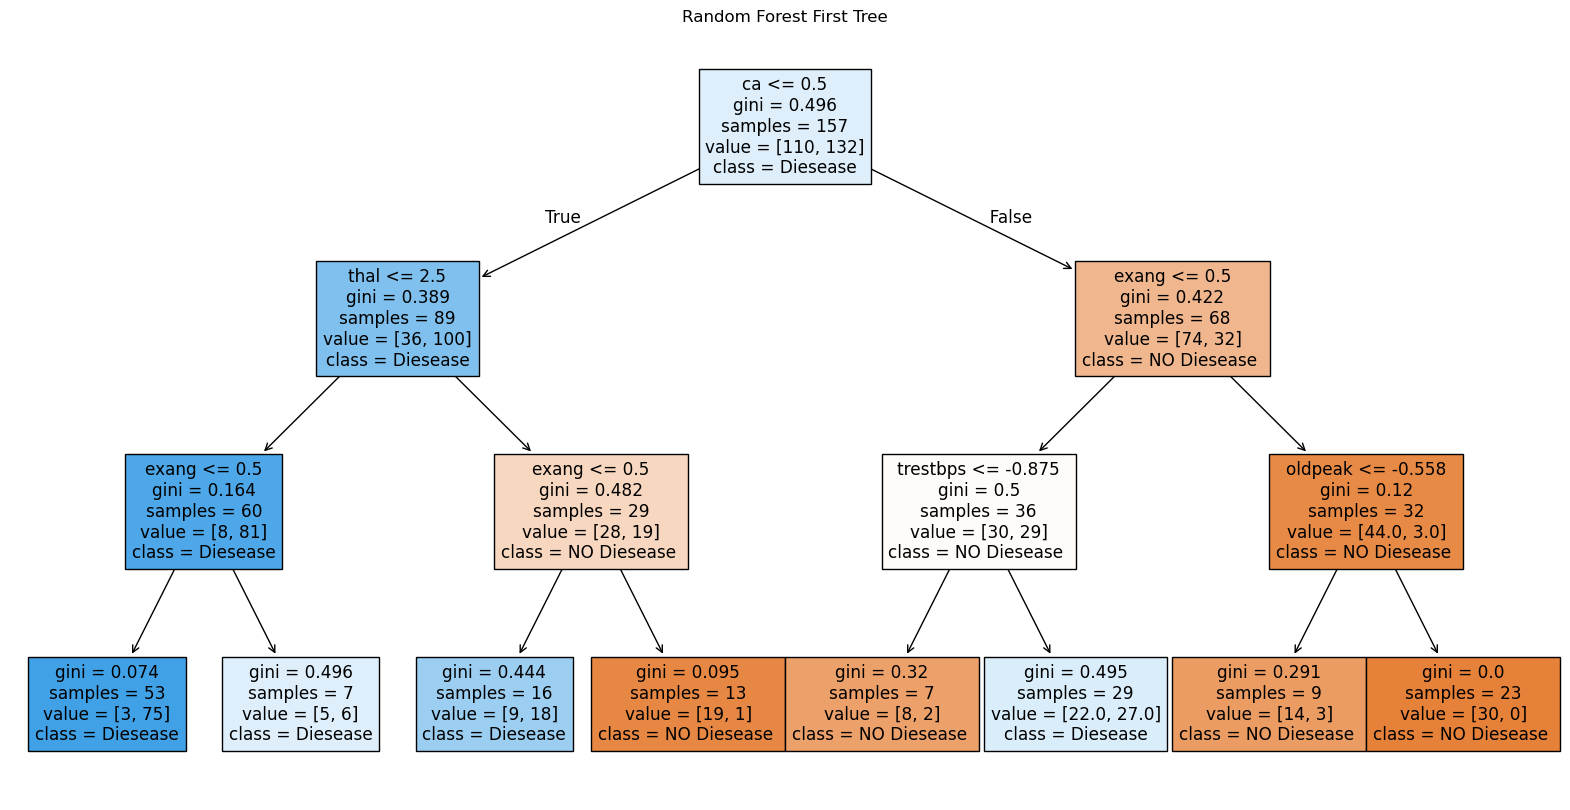

In [196]:
best_clf=Grid_rf.best_estimator_
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(best_clf.estimators_[0],
           feature_names=x_train.columns, 
           class_names=['NO Diesease ', 'Diesease'],
           filled=True, 
           max_depth=3)
plt.title("Random Forest First Tree")
plt.show()

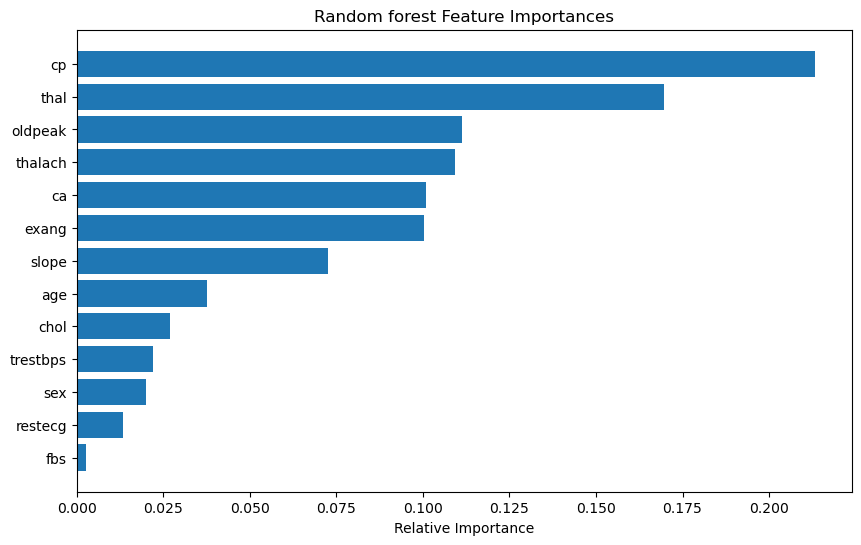

In [197]:
# importance of features
importances = best_clf.feature_importances_
indices = np.argsort(importances)[::1]
plt.figure(figsize=(10, 6))
plt.title("Random forest Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [x_train.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

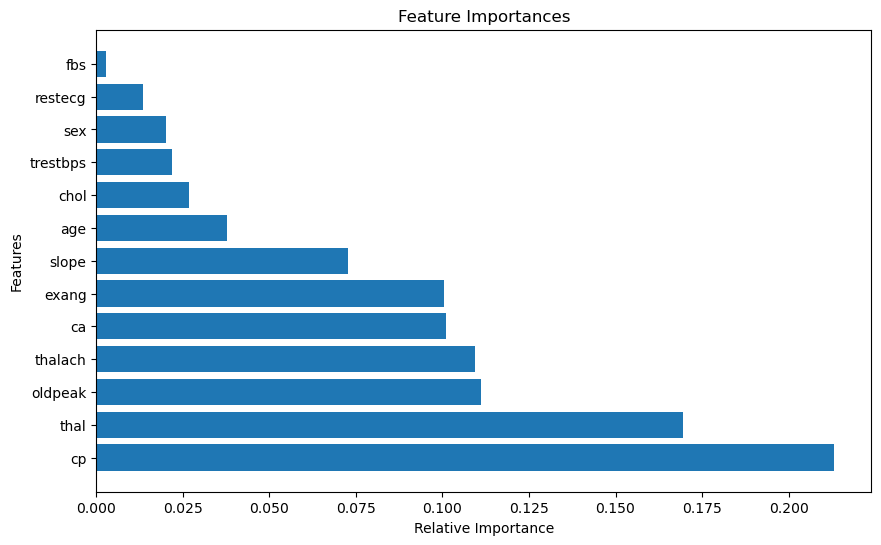

In [198]:
# Also we can plot feature importances like this
importances = best_clf.feature_importances_
indices=importances.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.barh(
    [x_train.columns[i] for i in indices],
    importances[indices]
)
plt.title("Feature Importances")
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.show()

In [199]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score, roc_auc_score,auc
y_pred=best_clf.predict(x_test)
y_pred_proba=best_clf.predict_proba(x_test)[:,1]

accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")




Accuracy: 0.8032786885245902
Precision: 0.7441860465116279
Recall: 0.9696969696969697
F1 Score: 0.8421052631578947
ROC AUC: 0.9123376623376624


# Boosting 


In [200]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [None,2, 3, 5],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2],
}
Grid_gb=GridSearchCV(
    gb,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
)
Grid_gb.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05],
                         'max_depth': [None, 2, 3, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [201]:
best_gb=Grid_gb.best_estimator_

Text(0.5, 1.0, 'Gradient Boosting First Tree')

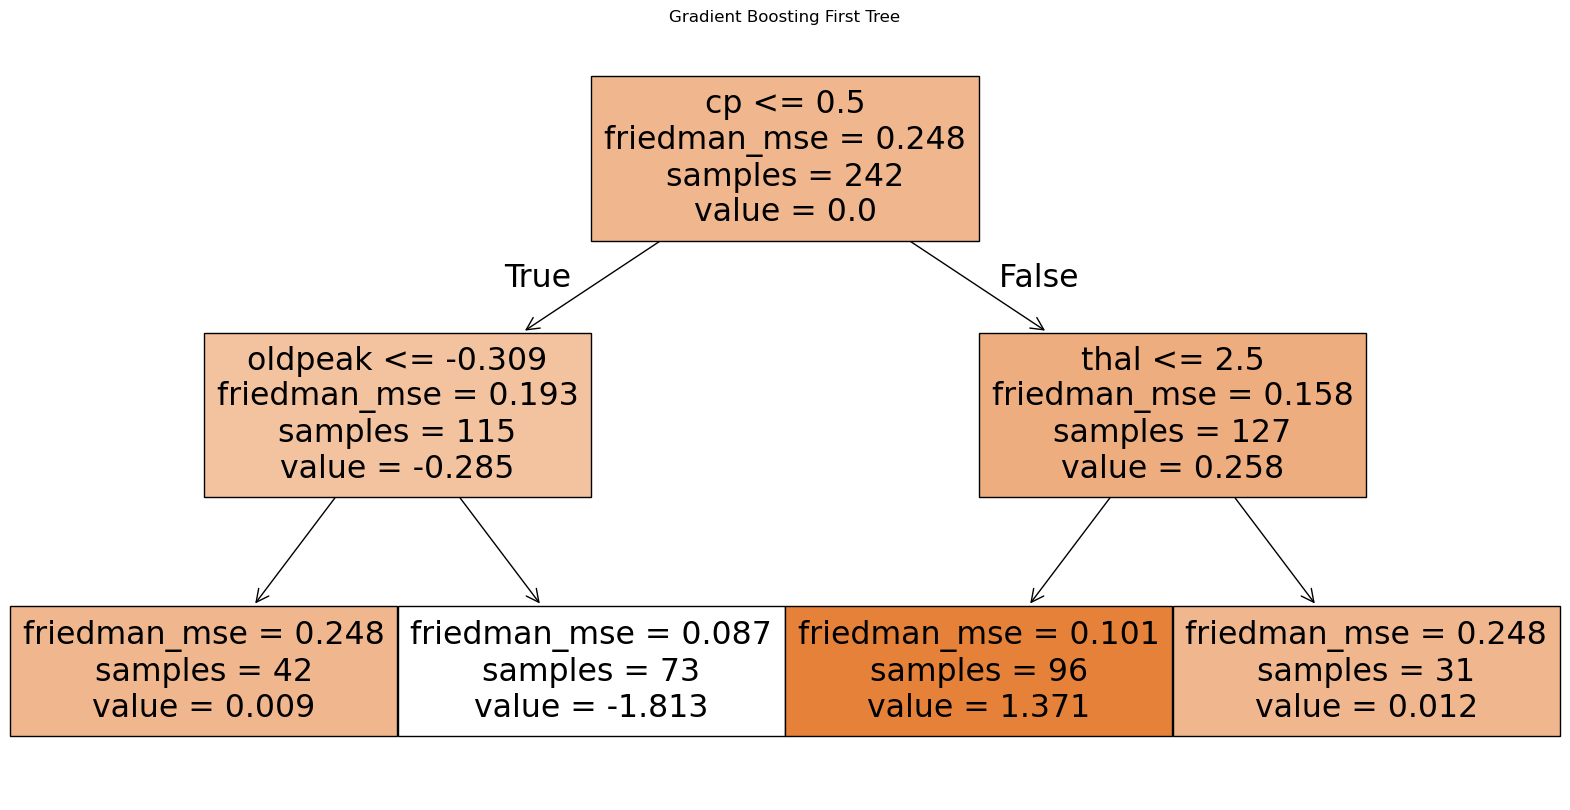

In [202]:
plt.figure(figsize=(20,10))
plot_tree(best_gb.estimators_[0,0],
           feature_names=x_train.columns, 
           class_names=['NO Diesease ', 'Diesease'],
           filled=True, 
           max_depth=3)
plt.title("Gradient Boosting First Tree")

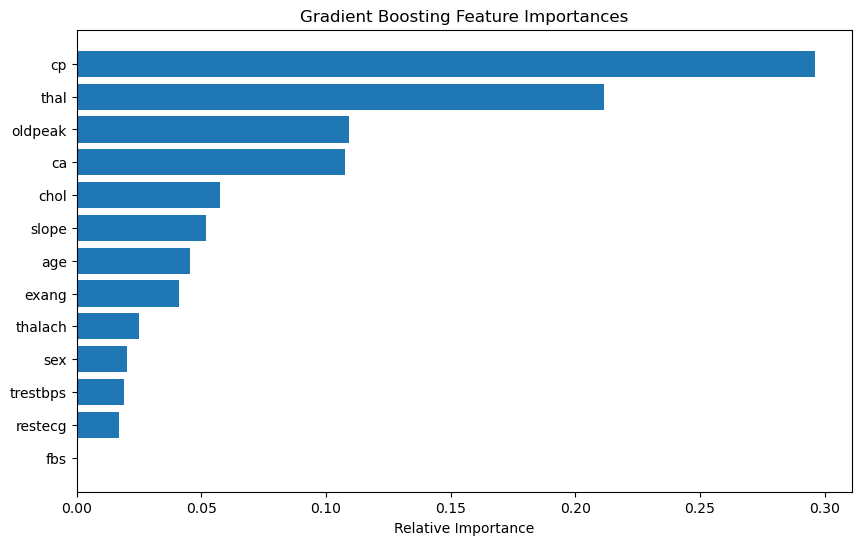

In [203]:
# importance of features
importances = best_gb.feature_importances_
indices = np.argsort(importances)[::1]
plt.figure(figsize=(10, 6))
plt.title("Gradient Boosting Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [x_train.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

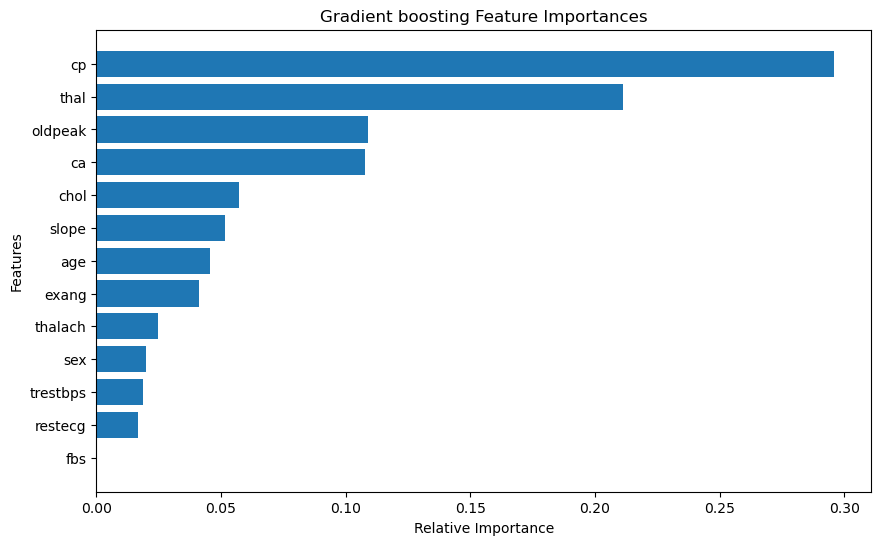

In [204]:
importances = best_gb.feature_importances_
indices=importances.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.barh(
    [x_train.columns[i] for i in indices],
    importances[indices]
)
plt.title("Gradient boosting Feature Importances")
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

In [205]:

y_pred_gb=best_gb.predict(x_test)
y_pred_proba_gb=best_gb.predict_proba(x_test)[:,1]
accuracy_gb=accuracy_score(y_test,y_pred_gb)
precision_gb=precision_score(y_test,y_pred_gb)
recall_gb=recall_score(y_test,y_pred_gb)
f1_gb=f1_score(y_test,y_pred_gb)
roc_auc_gb=roc_auc_score(y_test,y_pred_proba_gb)

print(f"Accuracy: {accuracy_gb}")
print(f"Precision: {precision_gb}")
print(f"Recall: {recall_gb}")
print(f"F1 Score: {f1_gb}")
print(f"ROC AUC: {roc_auc_gb}")



Accuracy: 0.8360655737704918
Precision: 0.7948717948717948
Recall: 0.9393939393939394
F1 Score: 0.8611111111111112
ROC AUC: 0.8961038961038961


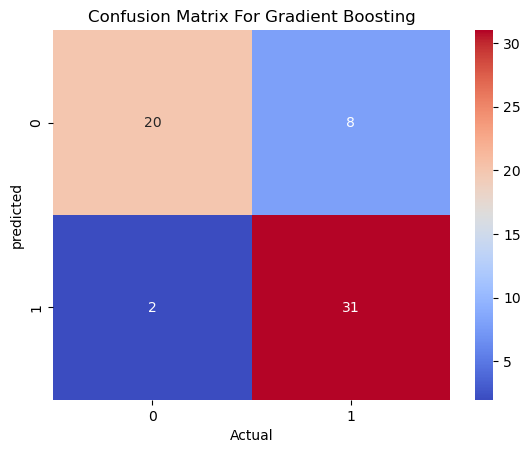

In [208]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_gb)
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Confusion Matrix For Gradient Boosting')
plt.show()